<br>
<h1><b>Introduction</b></h1>

Road Safety and Accidents have been on the rise over the past few years and is becoming one of the leading causes of injury and death. Road Accidents can be minor, serious and even fatal in many cases and hence there is an increasing need to understand the risk factors that are associated with these accidents so that we can reduce this number as well as the severity of the accidents. <i>For this project, the main aim is to build a model that can predict the severity of the accidents in the different junctions and address blocks by analysing their association with factors such as the surrounding lighting and weather conditions.</i>

This analysis will be useful not only to concerned authorities such as the Police and Road & Transport Authority (RTA) but also to the general public as it will create an awareness of the factors that they need to take into consideration while driving to ensure their own as well as the safety of others.

<b><h1>Data</h1></b>

The dataset being used has been provided by Coursera and can be accessed from the following link https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.

The data pertains to the road traffic accidents in the city of Seattle within the time frame of 16 years (2004-2020). The initial dataset contains 38 different attributes and information on 194673 accidents. Since the focus of our study is analysing accidents around junctions & address blocks and how these are influenced by lighting and weather, we will be using the following features:
<br>
<br>
<li> <b> SEVERITYCODE: </b> A code that corresponds to the severity of the
collision: 
<ul>
<li> 3 - Fatality</li>
<li> 2b - Serious Injury</li>
<li>2 - Injury</li>
<li>1 - Prop damage</li>
<li>0 - Unknown </li>
</ul>
</li>
<br>
<li> <b> ADDRTYPE: </b> Collision address type:
<ul>
    <li>Alley</li>
    <li>Block</li>
    <li>Intersection</li>
</ul>
</li>
<br>
<li> <b> JUNCTIONTYPE:</b> Category of junction at which collision took
place 
</li>
<br>
<li> <b> SDOT_COLDESC:</b> A description that corresponds to the state’s
coding designation.  </li>
<br>
<li> <b> WEATHER:</b> A description of the weather conditions during
the time of the collision.  </li>
<br>
<li> <b> LIGHTCOND: </b>The light conditions during the collision. 
 </li>
<br>
<li> <b> ROADCOND:</b> The condition of the road during the collision. 
</li>

<h3>Importing The Necessary Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Initial Data Set</h3>

In [2]:
cdf=pd.read_csv("C:/Users/stark/OneDrive/Desktop/Data Science/Course-9 Applied Capstone Project/Data-Collisions.csv")
cdf

C:\Users\stark\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


<h3> Data Dimensions Before Preprocessing & Cleaning </h3>

In [3]:
cdf.shape

(194673, 38)

In [4]:
cdf.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

<h3>Data Wrangling</h3>

Since we are mainly going to focus on SEVERITYCODE, ADDRTYPE, JUNCTIONTYPE, SDOT_COLDESC, WEATHER, LIGHTCOND and ROADCOND, we will create a seperate dataframe with these attributes only

In [5]:
df=cdf[["SEVERITYDESC", "ADDRTYPE", "JUNCTIONTYPE", "SDOT_COLDESC" , "WEATHER" , "LIGHTCOND", "ROADCOND"]]
df

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND,ROADCOND
0,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight,Wet
1,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On,Wet
2,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight,Dry
3,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
4,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight,Wet
...,...,...,...,...,...,...,...
194668,Injury Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
194669,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight,Wet
194670,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
194671,Injury Collision,Intersection,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk,Dry


<h3>To Find Out and Clean Missing Information If Any</h3>

In [6]:
df.isnull().sum()

SEVERITYDESC       0
ADDRTYPE        1926
JUNCTIONTYPE    6329
SDOT_COLDESC       0
WEATHER         5081
LIGHTCOND       5170
ROADCOND        5012
dtype: int64

In [7]:
df.describe(include="all")

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND,ROADCOND
count,194673,192747,188344,194673,189592,189503,189661
unique,2,3,7,39,11,9,9
top,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
freq,136485,126926,89800,85209,111135,116137,124510


In [8]:
print("The max number of null vallues are:", df["SEVERITYDESC"].count()-df["JUNCTIONTYPE"].count())

The max number of null vallues are: 6329


Since this is a minute fraction compared to the vast data set, these values can be dropped

In [9]:
df=df.dropna()
print("The New Dimensions of the Dataset are", df.shape)


The New Dimensions of the Dataset are (182914, 7)


To recheck once again if we have any null values:

In [10]:
df.isnull().sum()

SEVERITYDESC    0
ADDRTYPE        0
JUNCTIONTYPE    0
SDOT_COLDESC    0
WEATHER         0
LIGHTCOND       0
ROADCOND        0
dtype: int64

<h3>Resetting The Index</h3>

In [11]:
df=df.reset_index(drop=True)
df

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND,ROADCOND
0,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight,Wet
1,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On,Wet
2,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight,Dry
3,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
4,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight,Wet
...,...,...,...,...,...,...,...
182909,Injury Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
182910,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight,Wet
182911,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
182912,Injury Collision,Intersection,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk,Dry


<h3> Final Data Set After Cleaning & Preprocessing </h3>

In [12]:
df

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND,ROADCOND
0,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight,Wet
1,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On,Wet
2,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight,Dry
3,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
4,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight,Wet
...,...,...,...,...,...,...,...
182909,Injury Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
182910,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight,Wet
182911,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
182912,Injury Collision,Intersection,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk,Dry


<h3> Data Exploration & Analysis</h3>

<h4>Exploring the Features Of The Dataset</h4>

In [13]:
print("SEVERITY DESC: \n", df["SEVERITYDESC"].value_counts(),"\n")
print("JUNCTION TYPE: \n", df["JUNCTIONTYPE"].value_counts(),"\n")
print("ADDRESS TYPE: \n", df["ADDRTYPE"].value_counts(),"\n")
print("STATES CODING DESTINATION: \n", df["SDOT_COLDESC"].value_counts(),"\n")
print("WEATHER CONDITIONS \n", df["WEATHER"].value_counts(),"\n")
print("LIGHT CONDITIONS \n", df["LIGHTCOND"].value_counts(),"\n")
print("ROAD CONDITIONS \n", df["ROADCOND"].value_counts(),"\n")

SEVERITY DESC: 
 Property Damage Only Collision    126276
Injury Collision                   56638
Name: SEVERITYDESC, dtype: int64 

JUNCTION TYPE: 
 Mid-Block (not related to intersection)              86613
At Intersection (intersection related)               61221
Mid-Block (but intersection related)                 22341
Driveway Junction                                    10519
At Intersection (but not related to intersection)     2055
Ramp Junction                                          160
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64 

ADDRESS TYPE: 
 Block           119366
Intersection     63313
Alley              235
Name: ADDRTYPE, dtype: int64 

STATES CODING DESTINATION: 
 MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          83027
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    52488
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9776
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT 

<h3> Data Visualization </h3>

To get a clearer view of which features contribute to the severity, we will create graphs comparing eacg attribute w the SEVERITYCODE

<b>Junction Type v/s Severity</b>

<AxesSubplot:xlabel='JUNCTIONTYPE'>

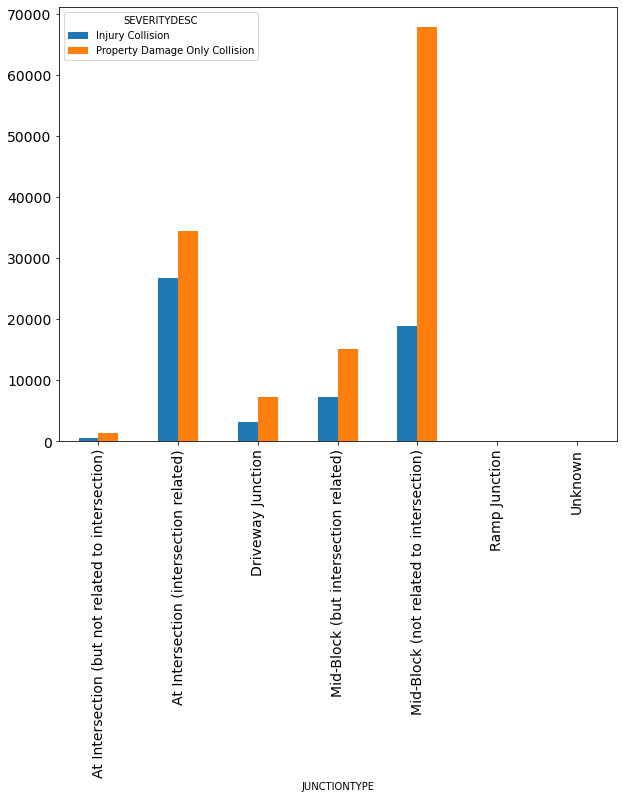

In [14]:
df.groupby(['JUNCTIONTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(10, 8), fontsize=14)

From this information we can conclude that the <b>Maximum number of road accidents involving Property Damage take place at Mid-Blocks</b> meanwhile the <b>Maximum number of road accidents involving Injury take place at intersections.</b>

<br>
<b>Address Type v/s Severity</b>

<AxesSubplot:xlabel='ADDRTYPE'>

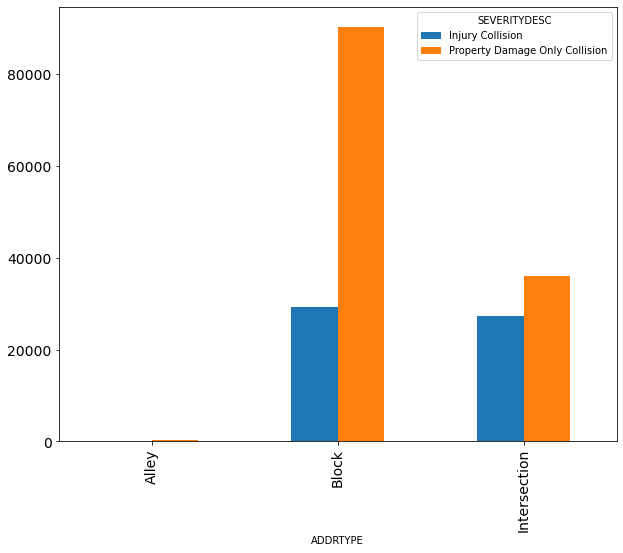

In [15]:
df.groupby(['ADDRTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(10, 8), fontsize=14)

From this graph we can conclude that <b>most of the accidents involving property damage take place at Blocks however the number of collisions involving Injury is about the same when it comes to Blocks & Intersections</b>.

<br>
<b>Point Of Collision v/s Severity</b>

<AxesSubplot:xlabel='SDOT_COLDESC'>

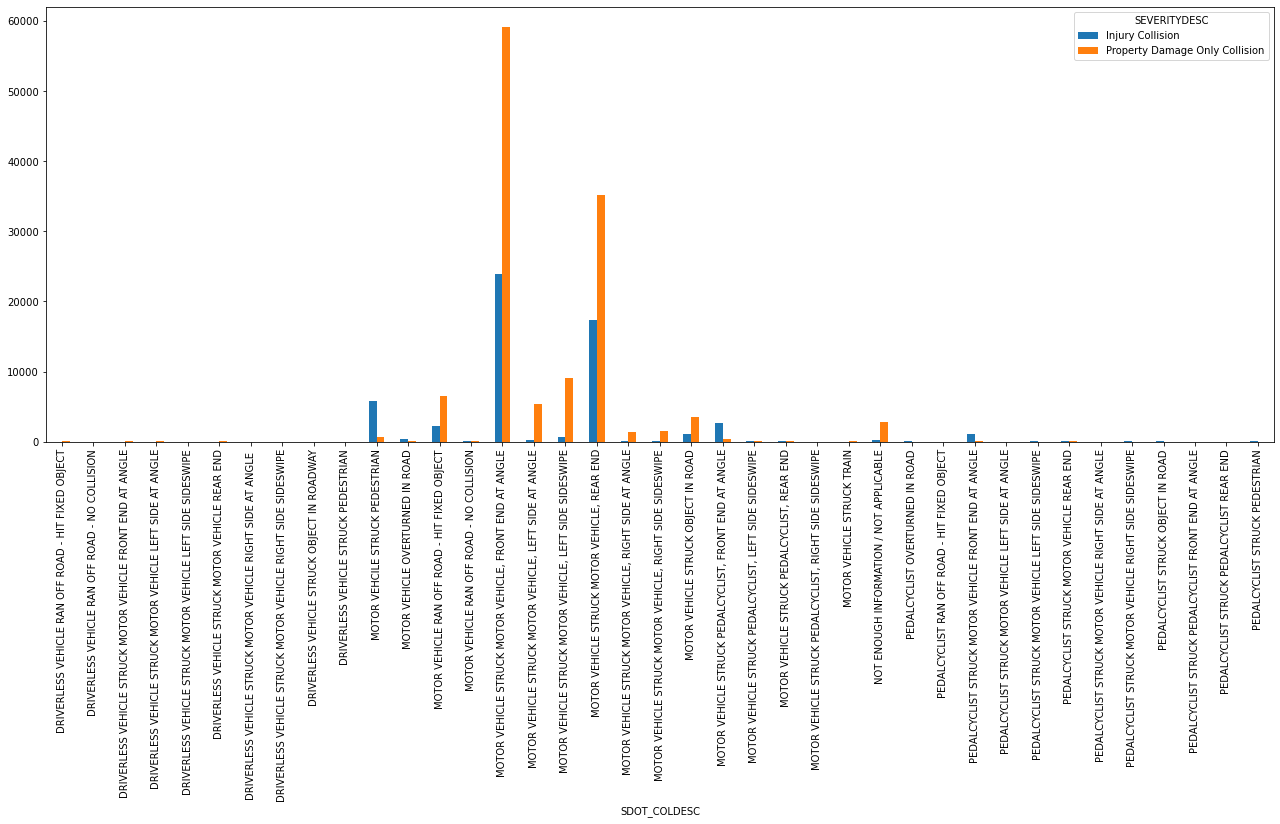

In [16]:
df.groupby(['SDOT_COLDESC', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(22, 8), fontsize=10)

<br>
<b>Light Conditions v/s Severity</b>

<AxesSubplot:xlabel='LIGHTCOND'>

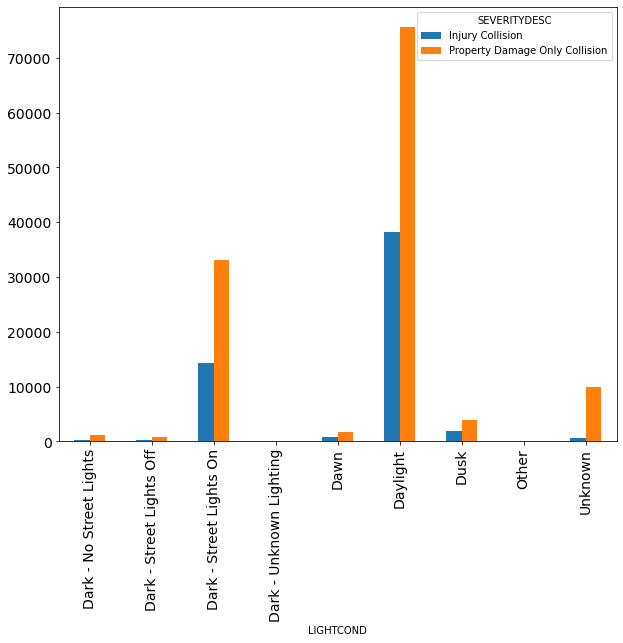

In [17]:
df.groupby(['LIGHTCOND', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(10, 8), fontsize=14)

It is quite interesting to note that despite common belief that most accidents take place in the dark or due to bad lighting conditions, the maximum number of accidents when it comes to both property damage as well as injury collisions, take place in Daylight while the next highest numbers for both are in the Dark with Street Lights On. This provides quite an insight as it emphasizes that the role that the drivers play in accidents is in fact more impactful than the weather conditions.

<b>Road Conditions v/s Severity</b>

<AxesSubplot:xlabel='ROADCOND'>

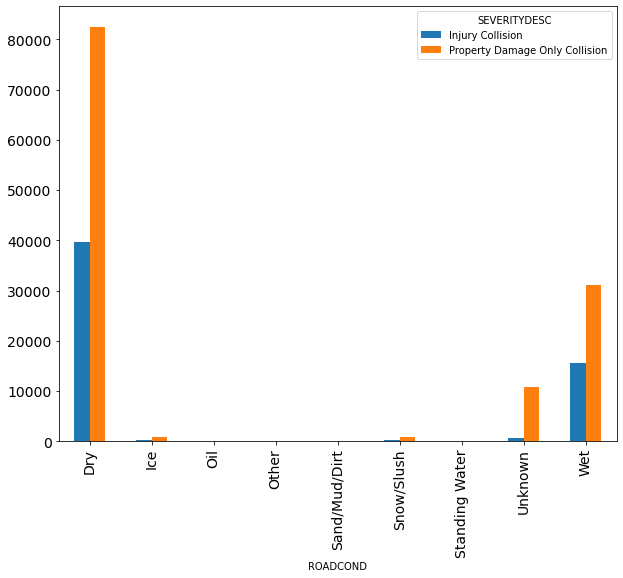

In [18]:
df.groupby(['ROADCOND', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(10, 8), fontsize=14)

Once again the finding here is quite significant as it is contrary to what one would expect. The maximum number of accidents pertaining to Dry Road Conditions is still double in number as compared to Wet Road Conditions. This once again signifies that the driver's abilities play a major role when it comes to preventing road accidents

<br>
<b>Weather Conditions v/s Severity</b>

<AxesSubplot:xlabel='WEATHER'>

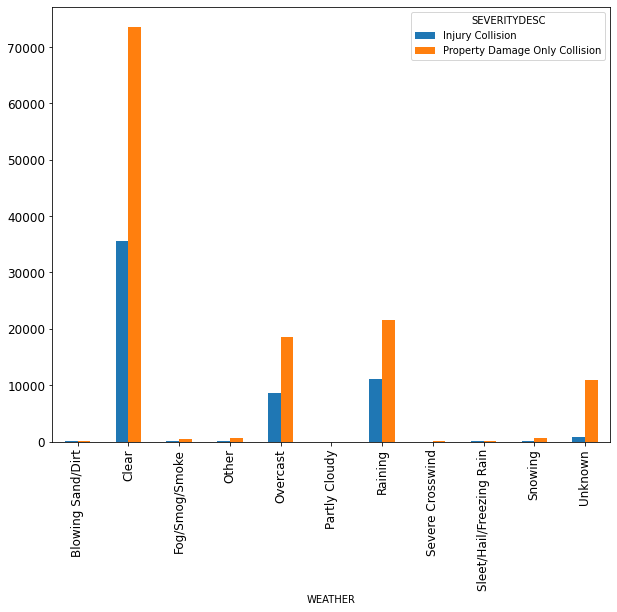

In [19]:
df.groupby(['WEATHER', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(10, 8), fontsize=12)

Finally, even plotting the graph against weather conditions and Severity gives the same result, that the maximum number of accidents take place in Clear Weather.

<h3> Model Development </h3>

Since the main purpose of our project is to be able to predict that given a set of features, we should be able to predict whether an accident will lead to mere Property Damage or Injury. For this purpose, I will be using a Decision Tree Classifier as my Machine Learning Algorithm.

This sends us back into the Data Preparation & Preprocessing Phase so that we are able to create the Decision Tree.

Since all of the feature variables are Categorical in nature, we will use One Hot Encoding to convert them into Continuous Values.

In [20]:
df

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND,ROADCOND
0,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight,Wet
1,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On,Wet
2,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight,Dry
3,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
4,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight,Wet
...,...,...,...,...,...,...,...
182909,Injury Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
182910,Property Damage Only Collision,Block,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight,Wet
182911,Injury Collision,Intersection,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight,Dry
182912,Injury Collision,Intersection,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk,Dry


In [21]:
Feature=df['SEVERITYDESC']
Feature=pd.concat([Feature, pd.get_dummies(df[['ADDRTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','LIGHTCOND']])], axis=1)

Feature.head()

,SEVERITYDESC,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
Feature.drop(['SEVERITYDESC'], axis=1, inplace=True)
Feature

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182909,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
182910,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
182911,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182912,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<h3> Defining the Independent Variable: X & Dependent Variable: Y</h3>

In [23]:
X=Feature
Y=df["SEVERITYDESC"].values

In [24]:
print("X shape:",X.shape)
print ("y shape:", Y.shape)

X shape: (182914, 69)
y shape: (182914,)


<h3> Splitting The Data Set For Testing & Training </h3> 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Train Set:', X_train.shape, Y_train.shape)
print('Test Set:', X_test.shape, Y_test.shape)

Train Set: (146331, 69) (146331,)
Test Set: (36583, 69) (36583,)


<h3>Importing The Libraries For Creating The Decision Tree </h3>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

<h3> Final Model </h3>

<h4> Training Phase </h4>

In [27]:
Accident_Severity_Model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
Accident_Severity_Model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

<h4>Predicting Phase</h4>

In [28]:
Predicting_Severity=Accident_Severity_Model.predict(X_test)
print(Predicting_Severity [0:5])
print(Y_test [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
['Property Damage Only Collision' 'Property Damage Only Collision'
 'Injury Collision' 'Property Damage Only Collision' 'Injury Collision']


<h3>Model Evaluation</h3>

<h4> Checking The Accuracy </h4>

In [31]:
from sklearn import metrics
print("Decision Tree's Accuracy:", metrics.accuracy_score(Y_test, Predicting_Severity))

Decision Tree's Accuracy: 0.7289724735532898


<h3> Visualization Of The Decision Tree </h3>

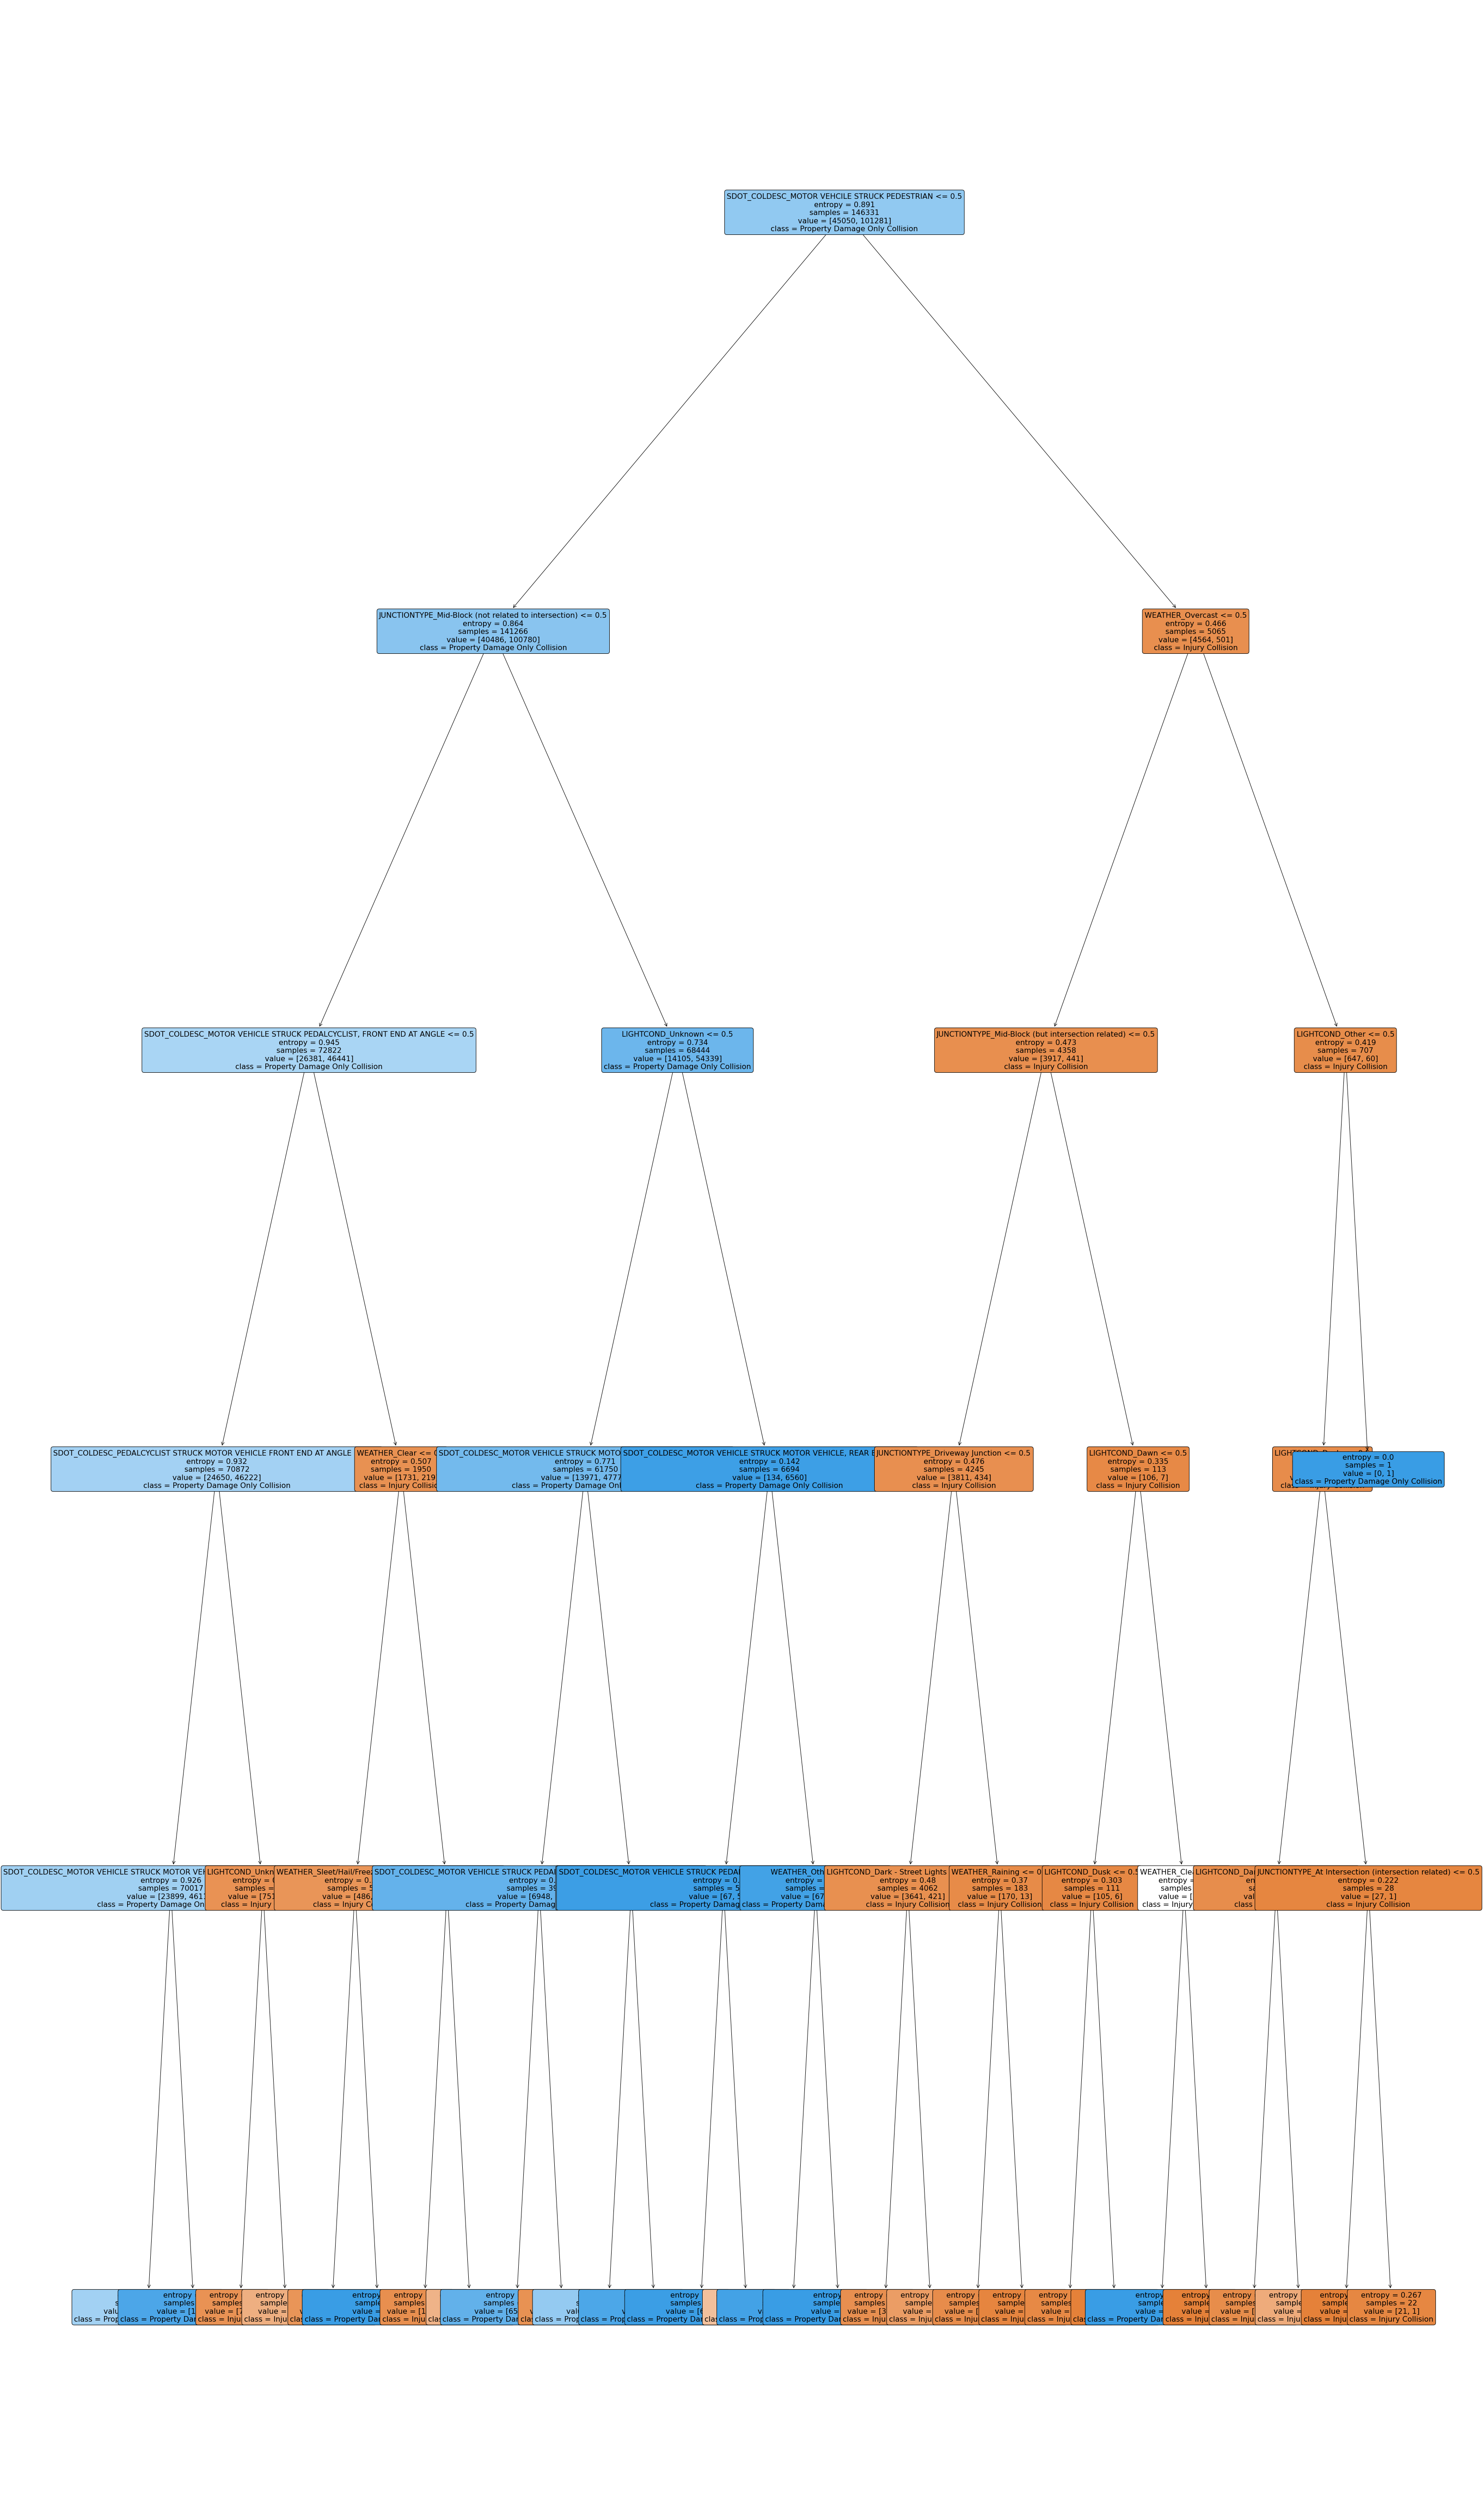

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree

fig=plt.figure(figsize=(50,100))
featureNames=Feature.columns
a=tree.plot_tree(Accident_Severity_Model, 
                   feature_names=featureNames,  
                   class_names=np.unique(Y_train),
                   filled=True, rounded=True, fontsize=16)
fig.savefig('CarAccidentSeverity.png')
